In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, GradientBoostingClassifier

In [52]:
df = pd.read_csv('heart_disease.csv')

In [16]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [11]:
df.columns


Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [53]:
df.rename(columns={'age':'Age',
                   'sex':'Sex',
                   'chest pain type':'ChestPainType',
                   'resting bp s':'RestingBloodPressure',
                   'cholesterol':'Cholesterol',
                   'fasting blood sugar':'FastingBloodSugar',
                   'resting ecg':'RestingECG',
                   'max heart rate':'MaxHeartRate',
                   'exercise angina':'ExerciseAngina',
                   'oldpeak':'Oldpeak',
                   'ST slope':'STSlope',
                   'target':'Label'}, inplace=True)

In [18]:
df

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseAngina,Oldpeak,STSlope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


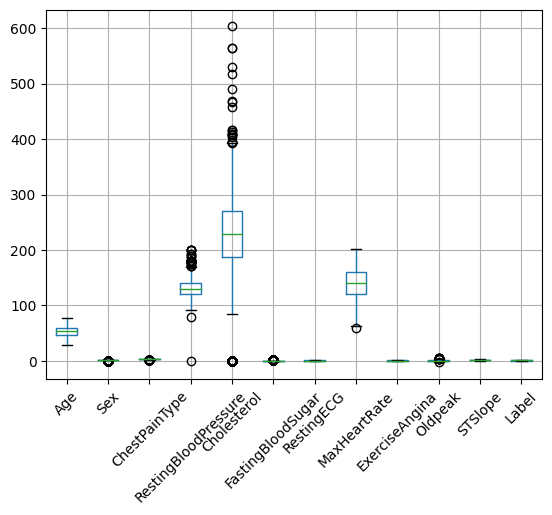

In [54]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [55]:
def delete_outliers(df: pd.DataFrame) -> pd.DataFrame:
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 -q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    
    clean_df = df.copy()

    for col in df.columns:
        clean_df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

    return clean_df


In [56]:
df = delete_outliers(df=df)

In [57]:
df

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseAngina,Oldpeak,STSlope,Label
0,40,1.0,2.0,140.0,289.0,0.0,0,172.0,0,0.0,1,0
1,49,1.0,3.0,160.0,180.0,0.0,0,156.0,0,1.0,2,1
2,37,1.0,2.0,130.0,283.0,0.0,1,98.0,0,0.0,1,0
3,48,1.0,4.0,138.0,214.0,0.0,0,108.0,1,1.5,2,1
4,54,1.0,3.0,150.0,195.0,0.0,0,122.0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1.0,1.5,110.0,264.0,0.0,0,132.0,0,1.2,2,1
1186,68,1.0,4.0,144.0,193.0,0.0,0,141.0,0,3.4,2,1
1187,57,1.0,4.0,130.0,131.0,0.0,0,115.0,1,1.2,2,1
1188,57,1.0,2.0,130.0,236.0,0.0,2,174.0,0,0.0,2,1


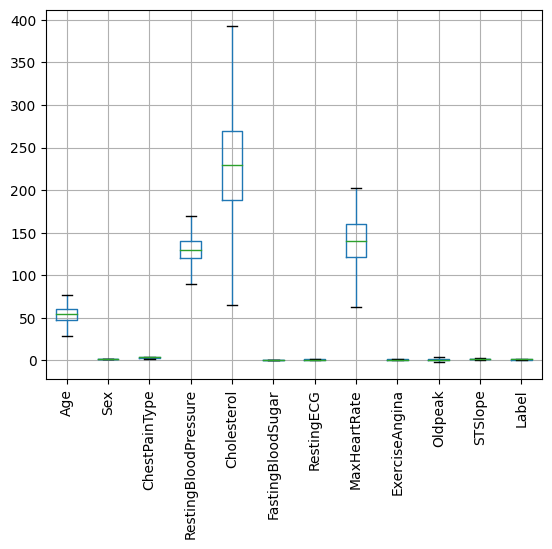

In [58]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [61]:
X = df.drop(columns=['Label'], axis=1)
y = df['Label']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [66]:
standard_scaler = StandardScaler()

In [67]:
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [80]:
LR = LogisticRegression().fit(X_train, y_train)
SVC = LinearSVC().fit(X_train, y_train)
GB = HistGradientBoostingClassifier().fit(X_train, y_train)
RF = RandomForestClassifier().fit(X_train, y_train)

In [81]:
y_pred_lr = LR.predict(X_test)
y_pred_svc = SVC.predict(X_test)
y_pred_hgb = GB.predict(X_test)
y_pred_rf = RF.predict(X_test)

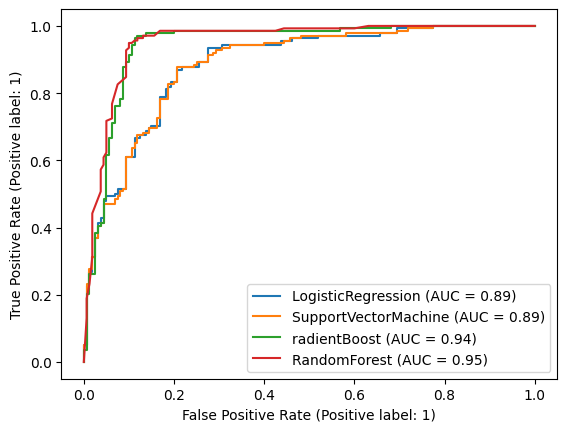

In [83]:
ax = plt.gca()

RocCurveDisplay.from_estimator(LR, X_test, y_test, ax=ax, name='LogisticRegression')
RocCurveDisplay.from_estimator(SVC, X_test, y_test, ax=ax, name='SupportVectorMachine')
RocCurveDisplay.from_estimator(GB, X_test, y_test, ax=ax, name='radientBoost')
RocCurveDisplay.from_estimator(RF, X_test, y_test, ax=ax, name='RandomForest')

plt.show()


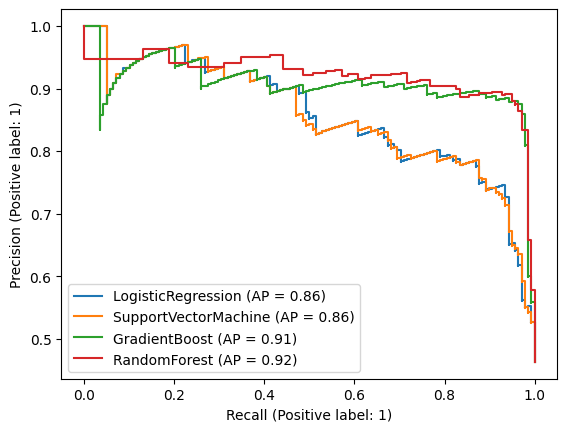

In [84]:
ax = plt.gca()

PrecisionRecallDisplay.from_estimator(LR, X_test, y_test, ax=ax, name='LogisticRegression')
PrecisionRecallDisplay.from_estimator(SVC, X_test, y_test, ax=ax, name='SupportVectorMachine')
PrecisionRecallDisplay.from_estimator(GB, X_test, y_test, ax=ax, name='GradientBoost')
PrecisionRecallDisplay.from_estimator(RF, X_test, y_test, ax=ax, name='RandomForest')

plt.show()

In [73]:
param_grid_lr = {
    'penalty':[None, 'l1', 'l2', 'elasticnet'],
    'C':np.linspace(0.01, 10, 50),
    'solver':['lbfgs', 'saga'],
    'l1_ratio':[0, 0.25, 0.5, 0.75, 1]
}

LR_grid = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, cv=10).fit(X_train, y_train)

c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1106:

In [74]:
param_grid_svc = {
    'penalty':['l1','l2'],
    'loss':['hinge','squared_hinge'],
    'C':np.linspace(0.01,10,50),
    'dual':False
}

SVC_grid = GridSearchCV(LinearSVC(), param_grid=param_grid_svc, cv=10).fit(X_train, y_train)

c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

In [87]:
param_grid_gb = {
    'loss':['log_loss','exponential'],
    'n_estimators':[100,125,150,175,200,225,250,275,300],
    'max_depth':[3,4,5,6,7,8,9,10]
}

HGB_grid = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_gb, cv=10).fit(X_train, y_train)

In [88]:
param_grid_rf = {
    'n_estimators':[100,125,150,175,200,225,250,275,300],
    'criterion':['gini','log_loss'],
    'max_depth':[2,3,4,5,6]
}

RF_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, cv=10).fit(X_train, y_train)

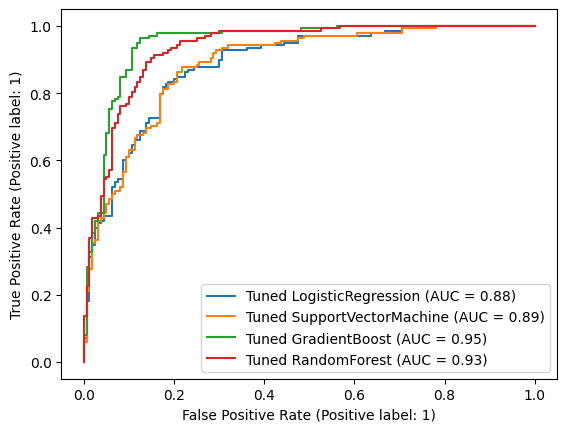

In [89]:
ax = plt.gca()

RocCurveDisplay.from_estimator(LR_grid, X_test, y_test, ax=ax, name='Tuned LogisticRegression')
RocCurveDisplay.from_estimator(SVC_grid, X_test, y_test, ax=ax, name='Tuned SupportVectorMachine')
RocCurveDisplay.from_estimator(HGB_grid, X_test, y_test, ax=ax, name='Tuned GradientBoost')
RocCurveDisplay.from_estimator(RF_grid, X_test, y_test, ax=ax, name='Tuned RandomForest')

plt.show()

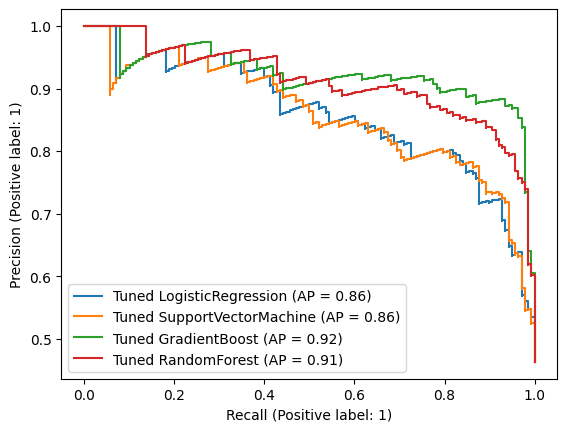

In [90]:
ax = plt.gca()

PrecisionRecallDisplay.from_estimator(LR_grid, X_test, y_test, ax=ax, name='Tuned LogisticRegression')
PrecisionRecallDisplay.from_estimator(SVC_grid, X_test, y_test, ax=ax, name='Tuned SupportVectorMachine')
PrecisionRecallDisplay.from_estimator(HGB_grid, X_test, y_test, ax=ax, name='Tuned GradientBoost')
PrecisionRecallDisplay.from_estimator(RF_grid, X_test, y_test, ax=ax, name='Tuned RandomForest')

plt.show()

In [91]:
y_pred_lr_grid = LR_grid.predict(X_test)
y_pred_svc_grid = SVC_grid.predict(X_test)
y_pred_gb_grid = HGB_grid.predict(X_test)
y_pred_rf_grid = RF_grid.predict(X_test)

In [97]:
print('LR\n',classification_report(y_test, y_pred_lr))
print('LR grid\n',classification_report(y_test, y_pred_lr_grid))

LR
               precision    recall  f1-score   support

           0       0.87      0.78      0.83       160
           1       0.77      0.87      0.82       138

    accuracy                           0.82       298
   macro avg       0.82      0.83      0.82       298
weighted avg       0.83      0.82      0.82       298

LR grid
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       160
           1       0.77      0.86      0.81       138

    accuracy                           0.81       298
   macro avg       0.81      0.82      0.81       298
weighted avg       0.82      0.81      0.81       298



In [98]:
print('SVC\n',classification_report(y_test, y_pred_svc))
print('SVC grid\n',classification_report(y_test, y_pred_svc_grid))

SVC
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       160
           1       0.78      0.87      0.82       138

    accuracy                           0.83       298
   macro avg       0.83      0.83      0.83       298
weighted avg       0.83      0.83      0.83       298

SVC grid
               precision    recall  f1-score   support

           0       0.86      0.79      0.83       160
           1       0.78      0.86      0.82       138

    accuracy                           0.82       298
   macro avg       0.82      0.82      0.82       298
weighted avg       0.83      0.82      0.82       298



In [99]:
print('GB\n',classification_report(y_test, y_pred_hgb))
print('GB grid\n',classification_report(y_test, y_pred_gb_grid))

GB
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       160
           1       0.88      0.96      0.92       138

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298

GB grid
               precision    recall  f1-score   support

           0       0.95      0.88      0.92       160
           1       0.87      0.95      0.91       138

    accuracy                           0.91       298
   macro avg       0.91      0.92      0.91       298
weighted avg       0.92      0.91      0.91       298



In [100]:
print('RF\n',classification_report(y_test, y_pred_rf))
print('RF grid\n',classification_report(y_test, y_pred_rf_grid))

RF
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       160
           1       0.88      0.96      0.92       138

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298

RF grid
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       160
           1       0.81      0.92      0.86       138

    accuracy                           0.87       298
   macro avg       0.87      0.87      0.87       298
weighted avg       0.87      0.87      0.87       298

